# Data exploration of Participant4
By Sheng Wang

### Aim
1. The aim of the report is to clean the data set and perform analysis to indicate any weekly trend of individual's step count.
2. How does weekend step counts different to the first two days of the week?

### Exploration
That we will first attempt to process the csv of marks of the participant's step data.The dataframe will be imported using pandas. We uses the pandas profiling for exploring the dataset.

In [1]:
#started 2022/10/08 finished 2022/10/08 by Sheng
import pandas as pd #import API
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
import scipy.stats as stats
from matplotlib.pyplot import MultipleLocator
n = pd.read_csv('C:/Users/danie/Downloads/Participant-04.csv')#read the data downloaded using pandas
n1 = pd.read_csv('C:/Users/danie/Downloads/Participant-07.csv')
n2  = pd.read_csv('C:/Users/danie/Downloads/Participant-08.csv')
n2

,Start,Finish,Steps (count)
0,01-Jan-2022 00:00,01-Jan-2022 01:00,0.0
1,01-Jan-2022 01:00,01-Jan-2022 02:00,0.0
2,01-Jan-2022 02:00,01-Jan-2022 03:00,0.0
3,01-Jan-2022 03:00,01-Jan-2022 04:00,0.0
4,01-Jan-2022 04:00,01-Jan-2022 05:00,0.0
...,...,...,...
6100,12-Sep-2022 03:00,12-Sep-2022 04:00,0.0
6101,12-Sep-2022 04:00,12-Sep-2022 05:00,0.0
6102,12-Sep-2022 05:00,12-Sep-2022 06:00,25.0
6103,12-Sep-2022 06:00,12-Sep-2022 07:00,0.0


The dataframe has been imported.

We  then want to clean the data so it is able to answer our aim

In [2]:
#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration from Audrey and Tiannan
m = pd.DataFrame({"Date": pd.to_datetime(n['Start']), "Steps":n['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling
dd = d.drop([0,1])
dd['Date'] = pd.to_datetime(d['Date'])
e = dd.resample('W', on="Date").sum()#resample to combine days into weeks
f = e.reset_index(drop=False)#give index again
f
m = pd.DataFrame({"Date": pd.to_datetime(n1['Start']), "Steps":n1['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling
dd = d.drop([0,1])
dd['Date'] = pd.to_datetime(d['Date'])
e = dd.resample('W', on="Date").sum()#resample to combine days into weeks
f1 = e.reset_index(drop=False)#give index again
f1
m = pd.DataFrame({"Date": pd.to_datetime(n2['Start']), "Steps":n2['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling
dd = d.drop([0,1])
dd['Date'] = pd.to_datetime(d['Date'])
e = dd.resample('W', on="Date").sum()#resample to combine days into weeks
f2 = e.reset_index(drop=False)#give index again
f

,Date,Steps
0,2022-01-09,71137.008341
1,2022-01-16,72000.345535
2,2022-01-23,76708.552968
3,2022-01-30,82691.949753
4,2022-02-06,72231.710790
5,2022-02-13,86187.376206
6,2022-02-20,83411.319657
7,2022-02-27,74467.556502
8,2022-03-06,74257.261975
9,2022-03-13,76971.907148


The hour measures has been merged into daily counts, then the days merged into week for weekly data.

(0.0, 34.0)

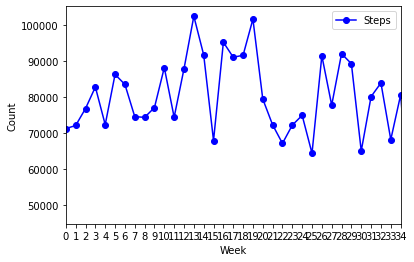

In [3]:
#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration and work from Tianshu
plt.plot(f.index, f['Steps'], color="blue",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,34)  # Set the x range matching the dataframe above



(0.0, 35.0)

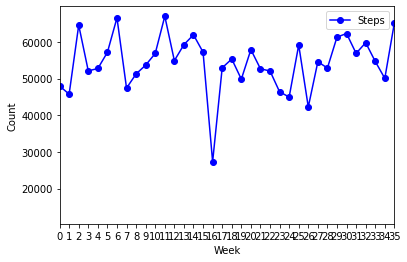

In [4]:
#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration and work from Tianshu
plt.plot(f1.index, f1['Steps'], color="blue",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,35)  # Set the x range matching the dataframe above



(0.0, 35.0)

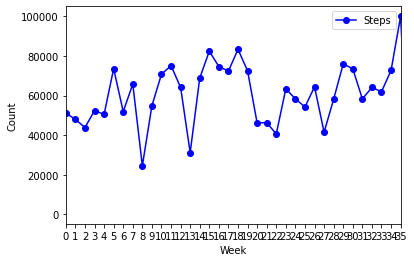

In [5]:
#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration and work from Tianshu
plt.plot(f2.index, f2['Steps'], color="blue",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,35)  # Set the x range matching the dataframe above



(0.0, 35.0)

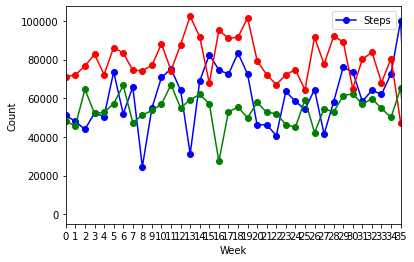

In [6]:
#started 2022/10/18 finished 2022/10/18 by Sheng and thanks for exploration and work from Tianshu
plt.plot(f2.index, f2['Steps'], color="blue",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')
plt.plot(f.index, f['Steps'], color="red",marker="o") 

plt.plot(f1.index, f1['Steps'], color="green",marker="o") 

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,35)

This graph shows the weekly data of this individual, is shows a quite high level of movement weekly. This will be used for comparison with others for the final product notebook to answer our aim

In [7]:

#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration from Audrey and Tiannan
m = pd.DataFrame({"Date": pd.to_datetime(n['Start']), "Steps":n['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling

#drop weekend
d1 = d.drop([0,1,7,8,14,15,21,22,28,29,35,36,42,43,49,50,56,57,63,64,70,71,77,78,84,85,91,92,98,99,105,106,112,113,119,120,126,127,133,134,140,141,147,148,154,155,161,162,168,169,175,176,182,183,189,190,196,197,203,204,210,211,217,218,224,225,231,232,238,239,245,246])
d1['Date'] = pd.to_datetime(d1['Date'])
e1 = d1.resample('W', on="Date").sum()#resample to combine days into weeks
f3 = e1.reset_index(drop=False)#give index again

#drop monday and tuesday
d2 = d.drop([0,1,2,3,9,10,16,17,23,24,30,31,37,38,44,45,51,52,58,59,65,66,72,73,79,80,86,87,93,94,100,101,107,108,114,115,121,122,128,129,135,136,142,143,149,150,156,157,163,164,170,171,177,178,184,185,191,192,198,199,205,206,212,213,219,220,226,227,233,234,240,241,247,248])
d2['Date'] = pd.to_datetime(d2['Date'])
e2 = d2.resample('W', on="Date").sum()#resample to combine days into weeks
f4 = e2.reset_index(drop=False)#give index again
f4


,Date,Steps
0,2022-01-09,54119.344430
1,2022-01-16,54215.728993
2,2022-01-23,57728.737848
3,2022-01-30,59339.000000
4,2022-02-06,59726.710790
5,2022-02-13,66137.376206
6,2022-02-20,58535.319657
7,2022-02-27,53601.000000
8,2022-03-06,55809.261975
9,2022-03-13,61627.907148


(0.0, 34.0)

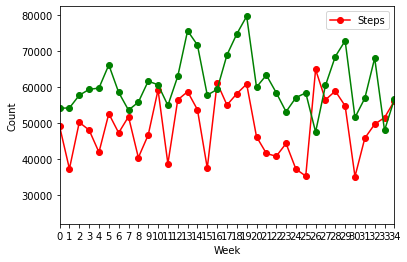

In [8]:
#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration from Audrey and Tiannan
plt.plot(f3.index, f3['Steps'], color="red",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

plt.plot(f4.index, f4['Steps'], color="green",marker="o") 

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,34)  # Set the x range matching the dataframe above

(0.0, 34.0)

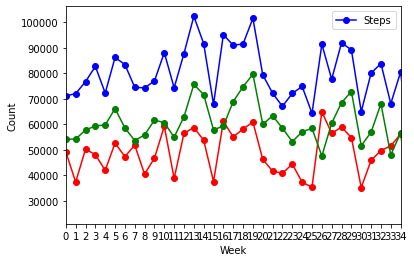

In [9]:
plt.plot(f.index, f['Steps'], color="blue",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

plt.plot(f3.index, f3['Steps'], color="red",marker="o") 


plt.plot(f4.index, f4['Steps'], color="green",marker="o") 

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,34)  # Set the x range matching the dataframe above


In [10]:

#started 2022/10/18 finished 2022/10/18 by Sheng and thanks for exploration from Audrey and Tiannan
m = pd.DataFrame({"Date": pd.to_datetime(n1['Start']), "Steps":n1['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling

d1 = d.drop([0,1,7,8,14,15,21,22,28,29,35,36,42,43,49,50,56,57,63,64,70,71,77,78,84,85,91,92,98,99,105,106,112,113,119,120,126,127,133,134,140,141,147,148,154,155,161,162,168,169,175,176,182,183,189,190,196,197,203,204,210,211,217,218,224,225,231,232,238,239,245,246,252,253])
d1['Date'] = pd.to_datetime(d1['Date'])
e1 = d1.resample('W', on="Date").sum()#resample to combine days into weeks
f5 = e1.reset_index(drop=False)#give index again


#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration from Audrey and Tiannan
d2 = d.drop([0,1,2,3,9,10,16,17,23,24,30,31,37,38,44,45,51,52,58,59,65,66,72,73,79,80,86,87,93,94,100,101,107,108,114,115,121,122,128,129,135,136,142,143,149,150,156,157,163,164,170,171,177,178,184,185,191,192,198,199,205,206,212,213,219,220,226,227,233,234,240,241,247,248,254,255])
d2['Date'] = pd.to_datetime(d2['Date'])
e2 = d2.resample('W', on="Date").sum()#resample to combine days into weeks
f6 = e2.reset_index(drop=False)#give index again
f5

,Date,Steps
0,2022-01-09,35371.000000
1,2022-01-16,35954.000000
2,2022-01-23,55362.000000
3,2022-01-30,38897.000000
4,2022-02-06,41232.000000
5,2022-02-13,39971.000000
6,2022-02-20,49292.000000
7,2022-02-27,37688.000000
8,2022-03-06,34585.000000
9,2022-03-13,33701.000000


(0.0, 35.0)

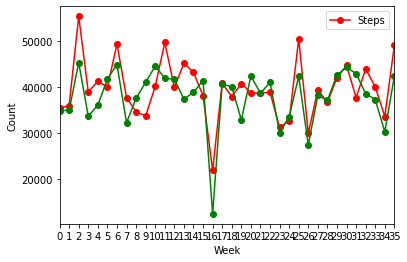

In [11]:
#started 2022/10/18 finished 2022/10/18 by Sheng and thanks for exploration from Audrey and Tiannan
plt.plot(f5.index, f5['Steps'], color="red",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

plt.plot(f6.index, f6['Steps'], color="green",marker="o") 

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,35)  # Set the x range matching the dataframe above

(0.0, 34.0)

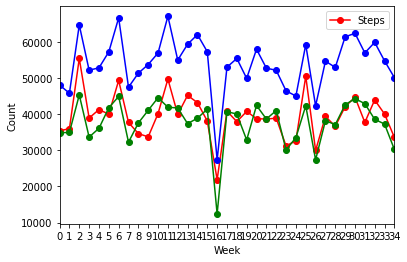

In [12]:
plt.plot(f5.index, f5['Steps'], color="red",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

plt.plot(f6.index, f6['Steps'], color="green",marker="o") 


plt.plot(f1.index, f1['Steps'], color="blue",marker="o") 

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,34)  # Set the x range matching the dataframe above



In [13]:

#started 2022/10/18 finished 2022/10/18 by Sheng and thanks for exploration from Audrey and Tiannan
m = pd.DataFrame({"Date": pd.to_datetime(n2['Start']), "Steps":n2['Steps (count)']})#create data frame of step and date and change to date format using package
m['Date'] = m['Date'].dt.strftime('%Y-%m-%d')#remove hour values from dates
s =  m.groupby(['Date']).sum()#group by days by adding all the hours
d = s.reset_index(drop=False)#set index for resampling

d1 = d.drop([0,1,7,8,14,15,21,22,28,29,35,36,42,43,49,50,56,57,63,64,70,71,77,78,84,85,91,92,98,99,105,106,112,113,119,120,126,127,133,134,140,141,147,148,154,155,161,162,168,169,175,176,182,183,189,190,196,197,203,204,210,211,217,218,224,225,231,232,238,239,245,246,252,253])
d1['Date'] = pd.to_datetime(d1['Date'])
e1 = d1.resample('W', on="Date").sum()#resample to combine days into weeks
f7 = e1.reset_index(drop=False)#give index again

#started 2022/10/09 finished 2022/10/09 by Sheng and thanks for exploration from Audrey and Tiannan
d2 = d.drop([0,1,2,3,9,10,16,17,23,24,30,31,37,38,44,45,51,52,58,59,65,66,72,73,79,80,86,87,93,94,100,101,107,108,114,115,121,122,128,129,135,136,142,143,149,150,156,157,163,164,170,171,177,178,184,185,191,192,198,199,205,206,212,213,219,220,226,227,233,234,240,241,247,248,254])
d2['Date'] = pd.to_datetime(d2['Date'])
e2 = d2.resample('W', on="Date").sum()#resample to combine days into weeks
f8 = e2.reset_index(drop=False)#give index again
f8

,Date,Steps
0,2022-01-09,39204.0
1,2022-01-16,28466.0
2,2022-01-23,34444.0
3,2022-01-30,38296.0
4,2022-02-06,44101.0
5,2022-02-13,49792.0
6,2022-02-20,38833.0
7,2022-02-27,46195.0
8,2022-03-06,15866.0
9,2022-03-13,44997.0


(0.0, 35.0)

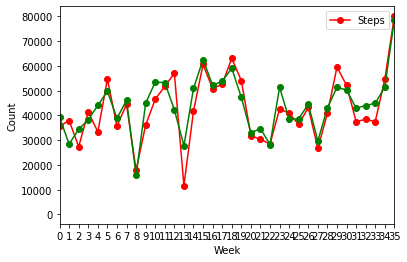

In [14]:
#started 2022/10/18 finished 2022/10/18 by Sheng and thanks for exploration from Audrey and Tiannan
plt.plot(f7.index, f7['Steps'], color="red",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

plt.plot(f8.index, f8['Steps'], color="green",marker="o") 

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,35)  # Set the x range matching the dataframe above

(0.0, 34.0)

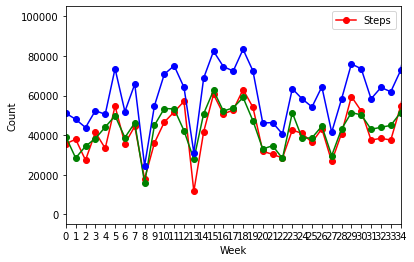

In [15]:
plt.plot(f7.index, f7['Steps'], color="red",marker="o") 
plt.legend(["Steps"])
plt.xlabel('Week')
plt.ylabel('Count')

plt.plot(f8.index, f8['Steps'], color="green",marker="o") 


plt.plot(f2.index, f2['Steps'], color="blue",marker="o") 

x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0,34)  # Set the x range matching the dataframe above


In [16]:
#perform paired t-test to test the difference in weekday and weekend differences.
stats.ttest_rel(f3['Steps'],f4['Steps'])

Ttest_relResult(statistic=-6.2198522784395065, pvalue=3.96777249615533e-07)

In [17]:
f9 = f5.drop([36])

stats.ttest_rel(f9['Steps'],f6['Steps'])

Ttest_relResult(statistic=2.403062502201866, pvalue=0.02169407342590991)

In [20]:
f10 = f7.drop([36])

stats.ttest_rel(f10['Steps'],f8['Steps'])

Ttest_relResult(statistic=-1.4192308269904486, pvalue=0.16467685907408394)